# Projekt
## Równania różniczkowe zwyczajne z laboratorium, 2023/2024

### Treść projektu
Układ równań opisujący położenie $(x, y)$ satelity (o pomijalnej, w porównaniu do ciał niebieskich, masie) na płaszczyźnie Ziemia-Księżyc wygląda następująco:

$$ \left\{ \begin{array}{rcl}
    \ddot{x} &=& x + 2\dot{y} - (1 - \mu) \frac{(x + \mu)}{A} - \mu \frac{(x - 1 + \mu)}{B} \\
    \ddot{y} &=& y - 2\dot{x} - (1 - \mu) \frac{y}{A} - \mu \frac{y}{B}
                \end{array}\right.$$

 
gdzie:

\begin{align}
    A &= \left( (x + \mu)^2 + y^2 \right)^{3/2} \\
    B &= \left( (x - 1 + \mu)^2 + y^2 \right)^{3/2}\\
    \mu &= 0.012277471
\end{align}

W tym układzie współrzędnych Ziemia znajduje się w punkcie $(−\mu, 0)$, zaś Księżyc w punkcie $(1 − \mu, 0)$. Można pokazać, że zagadnienie to ma rozwiązanie analityczne z warunkami początkowymi:

\begin{align}
    x(0) &= 0.994 & y(0) &= 0 \\
    \dot{x}(0) &= 0 & \dot{y}(0) &= −2.00158510637908252240537862224 \\
\end{align}

które jest okresowe, a jego okres w przybliżeniu wynosi:
$$ T_{0} = 17.0652165601579625588917206249$$

### Część przygotowawcza
#### Krok pierwszy


Przed implementacją, należy zaprojektować bazę projektu. Zaczynam od przekształcenia układu równań, podanego w treści, do wygodniejszej dla obliczeń postaci:
$$ \left\{ \begin{array}{rcl}
    \dot{x} &=& a \\
    \ddot{x} &=& x + 2b - (1 - \mu) \frac{(x + \mu)}{A} - \mu \frac{(x - 1 + \mu)}{B} \\
    \dot{y} &=& b \\
    \ddot{y} &=& y - 2a - (1 - \mu) \frac{y}{A} - \mu \frac{y}{B}
    \end{array}\right.$$
Wybrana koleność, a mianowicie, najpierw wszystko zależne od x, a potem od y, jest najlepszą, ponieważ ułatwia ona późniejsze rysownaie wykresów zależnych od x i y jednocześnie. Zatem, do rozwiązania powyższego układu równań będzie potrzbeny wektor z warunkami początkowymi z treści:
$$(x, \dot{x}, y, \dot{y}) = (x(0), y(0), \dot{x}(0), \dot{y}(0))$$

#### Krok drugi
Aby umożliwić efektywną implementację i uruchomienie projektu, należy zaimportować poniższe biblioteki, znane z ćwiczeń laboratoryjnych.
<br> *Numpy* - prydanty do Analizy Danych w Pythonie, w naszym przypadku - szybkie i skuteczne działania na wektorach.
<br> *Matplotlib.pyplot* - narzędzie do wizualizacji danych, w naszym przypadku - rysowanie wykresów, podsumowujących zadania.
<br> *Sympy* - biblioteka do obliczeń symbolicznych.

In [662]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sm

#### Krok trzeci

Definujemy stałe i funkcje z treści niezbędne w podalszej implementacji.

In [663]:
miu = 0.012277471
T0 = 17.0652165601579625588917206249 #okres rozwiązania

def A(x,y):
    return ((x + miu) ** 2 + y ** 2) ** (3/2)
    
def B(x,y):
    return ((x - 1 + miu) ** 2 + y ** 2) ** (3/2)

Również zdefinujmy warunki początkowe $v = (x, \dot{x}, y, \dot{y})$ oraz funkcję $f$, <br>ktora będzie zwracać rozwiązanie układu równań z kroku pierwszego w cześci przygotowawczej 
$(\dot{x}, \ddot{x}, \dot{y}, \ddot{y})$.

In [664]:
x0 = 0.994 #x(0)
dfx0 = 0 #x'(0)
y0 = 0 #y(0)
dfy0 = -2.00158510637908252240537862224 #y'(0)

#Wektor v, z warunkami początkowymi
X0 = [x0, dfx0, y0, dfy0] 

In [665]:
def f(t, v):
    x, dfx, y, dfy = v
    df_dfx = x + 2 * dfy - (1 - miu) * ((x + miu) / A(x, y)) - miu * ((x - 1 + miu) / B(x,y))
    df_dfy = y - 2 * dfx - (1 - miu) * (y / A(x,y)) - miu * (y / B(x,y))
    return np.array([dfx, df_dfx, dfy, df_dfy])

## Część zadaniowa
### Zadanie 1
Treść zadania:
Przedstaw przybliżone trajektorie satelity na opisanej płaszczyźnie uzyskane poprzez przybliżenia w krokach czasu $t_{k} = kh$:
1. schematem Eulera z krokiem $h = \frac{T_0}{24000}$ , 24000 kroków;
2. schematem Rungego-Kutty 4. rzędu z krokiem $h = \frac{T_0}{6000}$ , 6000 kroków.

#### Schemat Eulera
Na zajęciach Otwarty Schemat Eulera już został zdefiniowany, więc możemy skorzystać z gotowej implementacji tej metody. Tak jak napisano w treści ustalam krok $h = \frac{T_0}{24000}$ na przedziale [0, $T_{0}$].

**Otwraty schemat Eulera**

$ x_{k+1} = x_{k} + hf_{k}, \quad \text{gdzie} \quad f_{k} = f(t_{k}, x_{k}), \quad x_{0} = x(t_{0}) $

In [666]:
def Euler(f, a, b, x0, N):
  h = (b-a)/N #krok na przedziale [a,b]
  T = [a]
  X = [x0]
  t = a
  x = x0
    
  for i in range(N):
    x = x + f(t,x) * h
    t = t + h
    T.append(t) #numpy.linspace(a, b, N)
    X.append(x) #lista wartości

  return T, X

Poniżej przedstawione są 3 wykresy:
1. Pierwszy wykres pokazuje zależność zmiennej x od czasu, czyli położenie na osi x w pewnym momencie czasu t.
2. Drugi wykres pokazuje zależność zmiennej y od czasu.
3. Trzeci wykres pokazuje zależność zmiennej x od y, czyli opisuje trajektorię satelity.

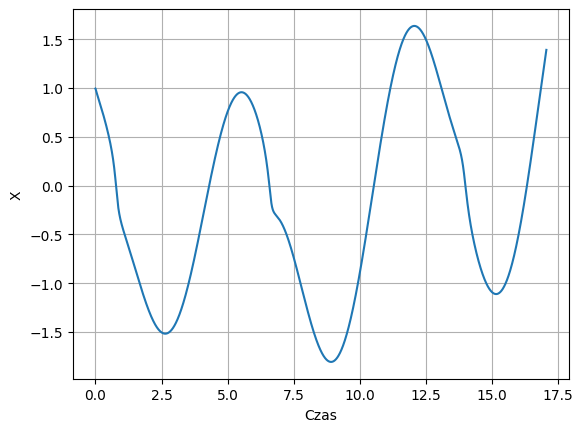

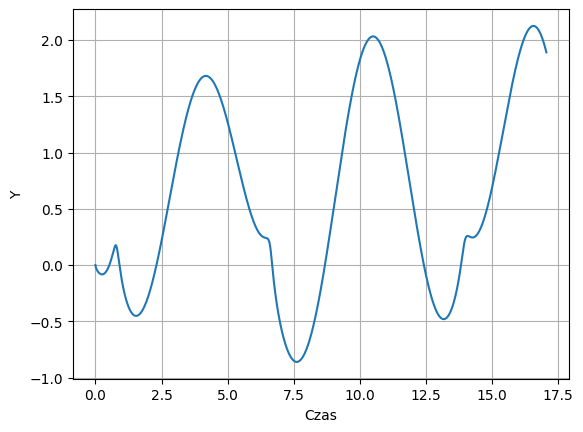

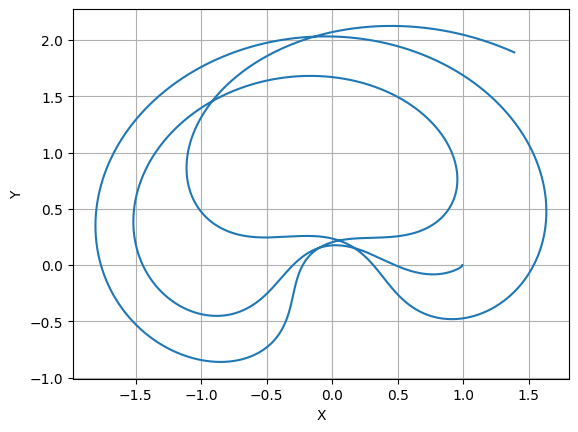

In [671]:
#Liczba kroków podana w treści zadania
N = 24000

T, XY = Euler(f, 0, T0, X0, N)

#Sprowadzamy tablicę do numpy.array, żeby mieć macierz, a nie tablicę z np.arrays
XY = np.array(XY)

plt.plot(T, XY[:, 0]) #zaleznosc x
plt.xlabel('Czas')
plt.ylabel('X')
plt.grid(True)
plt.show()

plt.plot(T, XY[:, 2]) #zaleznosc y
plt.xlabel('Czas')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(XY[:, 0], XY[:, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

#### Schemat Rungego-Kutty 4 rzędu
Ustalam krok $h = \frac{T_0}{6000}$ na przedziale analogicznym jak w schemacie Eulera [0, $T_{0}$].

**Schemat Rungego_Kutty 4**
\begin{equation}
\begin{aligned}
K_1 &= f(t_k, x_k), \\
K_2 &= f\left(t_k + \frac{h}{2}, x_k + \frac{h}{2}K_1\right), \\
K_3 &= f\left(t_k + \frac{h}{2}, x_k + \frac{h}{2}K_2\right), \\
K_4 &= f(t_k + h, x_k + hK_3), \\
x_{k+1} &= x_k + \frac{h}{6} (K_1 + 2K_2 + 2K_3 + K_4),
\end{aligned}
\end{equation}

Możemy też użyć implementację tego schematu, napisaną na zajęciach laboratoryjnych.

In [640]:
def RK4(f, a, b, x0, N): 
    h = (b - a) / N
    T = [a]
    X = [x0]
    t = a
    x = x0
    for i in range(N):
        K1 = f(t, x)
        K2 = f(t + h / 2, x + h * K1 / 2)
        K3 = f(t + h / 2, x + h * K2 / 2)
        K4 = f(t + h, x + h * K3)
        x = x + h * (K1 + 2 * K2 + 2 * K3 + K4) / 6 
        t = t + h
        T.append(t)
        X.append(x)
    return T, X

Postępujemy analogicznie jak w schemacie Eulera, ustalamy liczbę kroków $N = 6000$.
Wynikowo mamy znowu 3 wykresy:
1. Wykres zmiennej x zależnej od czasu t.
2. Wykres zmiennej y zależnej od czasu t.
3. Wykres zmiennej x zależnej od zmiennej y, czyli wykres trajektorii satelity.

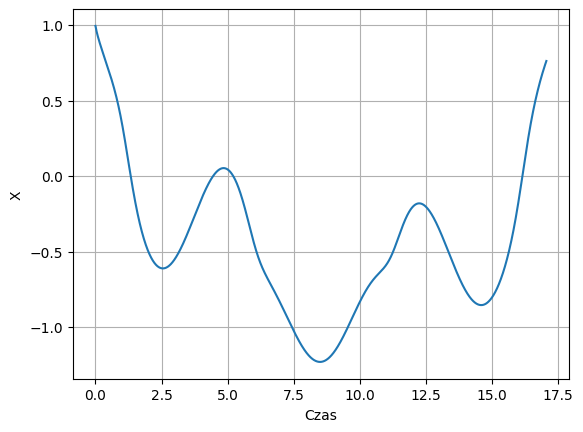

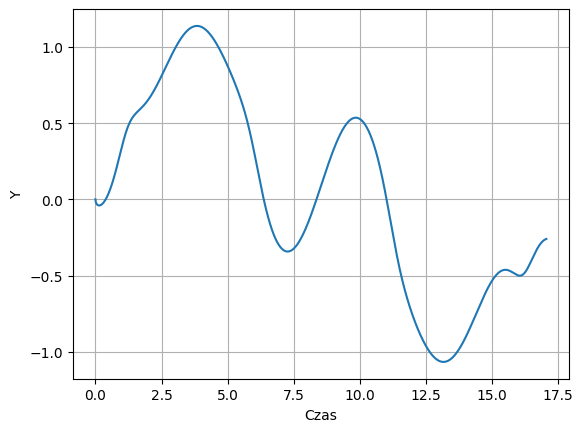

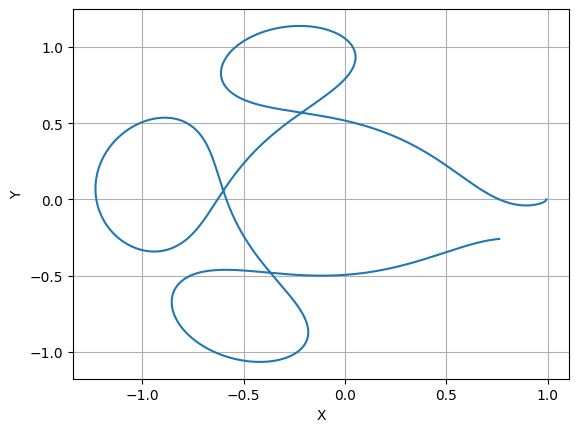

In [672]:
N = 6000

T, X = RK4(f, 0, T0, X0, N)
X = np.array(X)

plt.plot(T, X[:, 0]) #zaleznosc x
plt.xlabel('Czas')
plt.ylabel('X')
plt.grid(True)
plt.show()

plt.plot(T, X[:, 2]) #zaleznosc y
plt.xlabel('Czas')
plt.ylabel('Y')
plt.grid(True)
plt.show()

plt.plot(X[:, 0], X[:, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

##### Podsumowanie:
Schemat otwarty Eulera jest rzędu 1, a Rungego-Kutty jest 4 rzędu, co powoduję większą dokładność w przypadku 2 metody. Tą zależną możemy zauważyć też odwołowując się do wykresów. Wiemy, że nasza trajektoria powinna być okresową, czego nie widzimy na ilustracji odpowiadającej metodzie Otwartej Eulera. W przypadku schmetu Rungego-Kutty też występuje brak okresowości przy $t \to \inf$, ale wykres dokładniej odrysowuje trajektorie. Zachowanie trejektorii w przypadku 1 metody jest bardziej chaotyczne, a rozbieżność jest większa.

### Zadanie 2


Zaimplementuj numeryczny **schemat Dormanda-Prince’a** zadany następującą tabelką Butchera:

\begin{array}{c|cccccc}
0 & 0 & 0 & 0 & 0 & 0 & 0 \\
\frac{1}{5} & \frac{1}{5} & 0 & 0 & 0 & 0 & 0 \\
\frac{3}{10} & \frac{3}{40} & \frac{9}{40} & 0 & 0 & 0 & 0 \\
\frac{4}{5} & \frac{44}{45} & -\frac{56}{15} & \frac{32}{9} & 0 & 0 & 0 \\
\frac{8}{9} & \frac{19372}{6561} & -\frac{25360}{2187} & \frac{64448}{6561} & -\frac{212}{729} & 0 & 0 \\
1 & \frac{9017}{3168} & -\frac{355}{33} & \frac{46732}{5247} & \frac{49}{176} & -\frac{5103}{18656} & 0 \\
1 & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} \\
\hline
  & \frac{35}{384} & 0 & \frac{500}{1113} & \frac{125}{192} & -\frac{2187}{6784} & \frac{11}{84} & 0 \\
\end{array}

Schemat Dormanda-Prince'a jest pewną podrozmaitośćią metody Rungego-Kutty. Zgodnie z tabelką Butchera, jest to metoda jawna i wygląda następująco:


\begin{aligned}
    K_1 &= f(t_n, x_n) \\
    K_2 &= f\left(t_n + \frac{1}{5}h, y_n + \frac{1}{5}h K_1\right) \\
    K_3 &= f\left(t_n + \frac{3}{10}h, y_n + \frac{3}{40}h K_1 + \frac{9}{40}h K_2\right) \\
    K_4 &= f\left(t_n + \frac{4}{5}h, y_n + \frac{44}{45}h K_1 - \frac{56}{15}h K_2 + \frac{32}{9}h K_3\right) \\
    K_5 &= f\left(t_n + \frac{8}{9}h, y_n + \frac{19372}{6561}h K_1 - \frac{25360}{2187}h K_2 + \frac{64448}{6561}h K_3 - \frac{212}{729}h K_4\right) \\
    K_6 &= f\left(t_n + h, y_n + \frac{9017}{3168}h K_1 - \frac{355}{33}h K_2 + \frac{46732}{5247}h K_3 + \frac{49}{176}h K_4 - \frac{5103}{18656}h K_5\right) \\
    K_7 &= f\left(t_n + h, y_n + \frac{35}{384}h K_1 + 0 \cdot K_2 + \frac{500}{1113}h K_3 + \frac{125}{192}h K_4 - \frac{2187}{6784}h K_5 + \frac{11}{84}h K_6\right) \\
    x_{n+1} &= x_n + h \left( \frac{35}{384} K_1 + 0 \cdot K_2 + \frac{500}{1113} K_3 + \frac{125}{192} K_4 - \frac{2187}{6784} K_5 + \frac{11}{84} K_6 \right) \\
\end{aligned}

*Uwaga*: zmiana $\frac{44}{55}$ na $\frac{44}{45}$ dla poprawnośći wyników.

In [673]:
def Dormand_Prince(f, a, b, x0, N): 
    h = (b - a) / N 
    T = [a]
    X = [x0]
    t = a
    x = x0
    
    for i in range(N):
        K1 = f(t, x)
        K2 = f(t + h / 5, x + h * K1 / 5)
        K3 = f(t + h * (3 / 10), x + h * (K1 * (3 / 40) + K2 * (9 / 40)))
        K4 = f(t + h * (4 / 5), x + h * (K1 * (44 / 45) + K2 * (-56 / 15) + K3 * (32 / 9)))
        K5 = f(t + h * (8 / 9), x + h * (K1 * (19372 / 6561) + K2 * (-25360 / 2187) + K3 * (64448 / 6561) + K4 * (-212 / 729)))
        K6 = f(t + h, x + h * (K1 * (9017 / 3168) + K2 * (-355 / 33) + K3 * (46732 / 5247) + K4 * (49 / 176) + K5 * (-5103 / 18656)))
        K7 = f(t + h, x + h * (K1 * (35 / 384) + K2 * 0 + K3 * (500 / 1113) + K4 * (125 / 192) + K5 * (-2187 / 6784) + K6 * (11/84)))
        
        x = x + h * ((35 / 384) * K1 + 0 * K2 + (500 / 1113) * K3 + (125 / 192) * K4 + (-2187 / 6784) * K5 + (11 / 84) * K6 + 0 * K7) 
        t = t + h
        T.append(t)
        X.append(x)
        
    return T, X

Powyższy algorytm jest modyfikacją wcześniejszej funkcji *RK4*. 

Zmiany dokonane odpowiednio do obliczeń $K_{i}, i \in \{ 1,.., 7\}$ oraz wartości $x_{k}$.

#### Testowanie schematu
Wybrane przykłady z ćwiczeń i laboratorium:
1. $\dot{x} = x, \quad x(0) = 1$
2. $\dot{x} = x^3 +3,\quad x(0) = 7$

**1. Rozwiązanie analityczne pierwszego równania => $x(t) = \exp(t)$.** Możemy to sprawdzić wykorzystując bibliotekę sympy.


In [674]:
t = sm.symbols('t') # czas
x = sm.Function('x')(t) # funkcja x(t)

# Definicja równania różniczkowego: dx/dt = x
eq1 = sm.Eq(x.diff(t), x)

# Warunek początkowy: x(0) = 1
ics1 = {x.subs(t, 0): 1}

sol1 = sm.dsolve(eq1, ics=ics1) # szuka rozwiązania równania

print(f"Rozwiązanie równania: {sol1}")

Rozwiązanie równania: Eq(x(t), exp(t))


Przetestujmy schemat **DP** na pierwszym przykładzie, wybierąc przedział czasu $t \in [0, 10]$ oraz liczbę kroków $N = 100$.
<br>Zdefinujmy $f_{test}(t,x) = \dot{x}$.

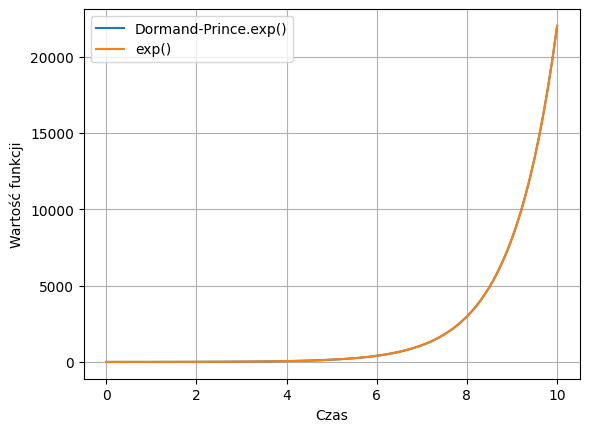

In [676]:
def f_test(t,x):
    return x

T, X1 = Dormand_Prince(f_test, 0, 10, 1, 100)

#X2 - wartości funkcji exp(x) z bibilioteki numerycznej numpy
X2 = np.exp(T)

#podział na przedziały czasowe T analogiczy dla obu wartości X1, X2
plt.plot(T, X1, label = "Dormand-Prince.exp()")
plt.plot(T, X2, label = "exp()")
plt.xlabel('Czas')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.grid(True)
plt.show()

Jak widać na rysunku, schemat Dormanda-Prince'a charakteryzuje się wysoką dokłądnością,ponieważ funkcje się pokrywają.

In [678]:
#Sprawdzamy błąd exp(x) i rozwiązania schematu Dormanda-Princea
print("Error DP.exp():", np.exp(10)-X1[-1]) #Największy bląd w ostatniej prawym końcu rozwiązania algorytmu

Error DP.exp(): -0.0005135771680215839


**2. Rozwiązanie analityczne drugiego równania => $x(t) = \frac{t^4}{4} + 3t + 7$.**

In [679]:
# Definicja równania różniczkowego: dx/dt = t^3 + 3
eq2 = sm.Eq(x.diff(t), t**3 + 3)

# Warunek początkowy: x(0) = 7
ics2 = {x.subs(t, 0): 7}

# Rozwiązywanie równania różniczkowego z warunkiem początkowym
sol2 = sm.dsolve(eq, ics=ics2)

# Wyświetlenie wyniku
print(f"Rozwiązanie równania: {sol2}")

Rozwiązanie równania: Eq(x(t), t**4/4 + 3*t + 7)


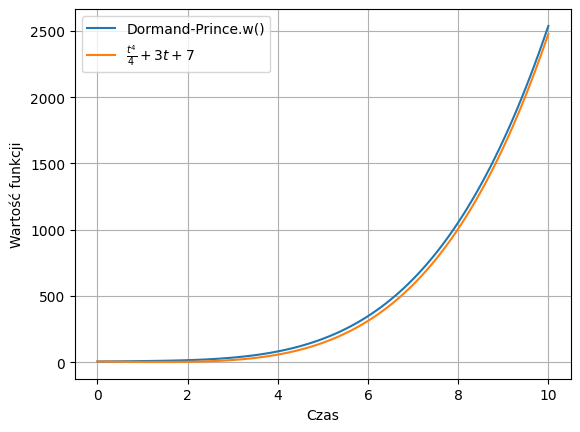

In [680]:
def w(t,x):
    return t ** 3 + 3

T, X3 = Dormand_Prince(w, 0, 10, 7, 100)
T = np.array(T)

#f_wiel(t) - definicji wielomianu, który jest rozwiązaniem równania
def w_wiel(t):
    return t ** 4 / 4 - 3 * t + 7
        
#podział na przedziały czasowe T analogiczy dla obu wartości X1, X2
plt.plot(T, X3, label = "Dormand-Prince.w()")
plt.plot(T, w_wiel(T), label=r"$\frac{t^4}{4} + 3t + 7$")
plt.xlabel('Czas')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.grid(True)
plt.show()

In [681]:
#Sprawdzamy błąd exp(x) i rozwiązania schematu Dormanda-Princea
print("Error DP.w():", abs(w_wiel(10) - X3[-1])) #Największy bląd w ostatniej prawym końcu rozwiązania algorytmu

Error DP.w(): 59.999999999989086


Tak duży błąd może być spowodowany tym, że błędy w arytmetyce zmiennoprzecinkowej *fl* dla wielomianów najczęściej rosną szybciej, 
niż błędy stosowanych metod numerycznych do rozwiązań równań różniczkowych.

#### Eksperymentalne badanie rzędu schemat
Aby zbadać rząd schematu możemy sprawdzić błędy dla poszczególnych kroków $N = 10, 100, 1000, 10000$ <br>dla funkcji $x(t) = \exp(t)$, 
dla której już zbadano poprawność schematu DP.

In [682]:
T, X10 = Dormand_Prince(f_test, 0, 5, 1, 10)
T, X100 = Dormand_Prince(f_test, 0, 5, 1, 100)
T, X1000 = Dormand_Prince(f_test, 0, 5, 1, 1000)

print("Error DP.exp() dla N = 10:", "{:.1e}".format(np.exp(5) - X10[-1]))
print("Error DP.exp() dla N = 100:", "{:.1e}".format(np.exp(5) - X100[-1]))
print("Error DP.exp() dla N = 1000:", "{:.1e}".format(np.exp(5) - X1000[-1]))

Error DP.exp() dla N = 10: -2.4e-03
Error DP.exp() dla N = 100: -5.9e-08
Error DP.exp() dla N = 1000: -9.7e-13


Zaokroglając błedy do jednej liczby po przecinku, możemy zauważyć, że zmiana w zależności od zwiększenia ilości kroków jest rzędu 5.

### Zadanie 3
Zastosuj schemat Dormanda-Prince’a do opisanego zagadnienia. Wypróbuj różne wartości kroku $h > 0$, dla wybranej samodzielnie wartości kroku h narysuj przybliżoną trajektorię satelity. Pamiętaj, aby w raporcie uzasadnić dobór kroku.

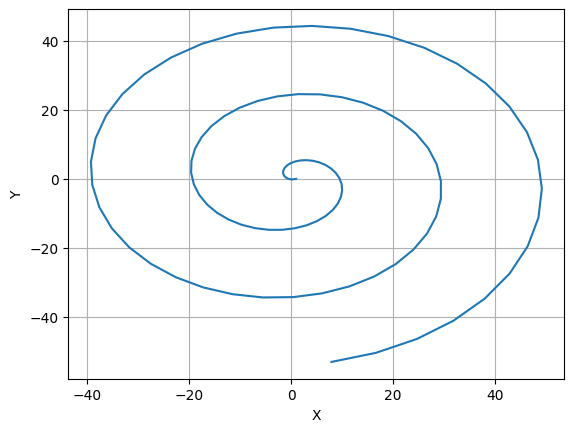

In [683]:
N = 100
T, X = Dormand_Prince(f, 0, T0, X0, N)
X = np.array(X)
plt.plot(X[:, 0], X[:, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

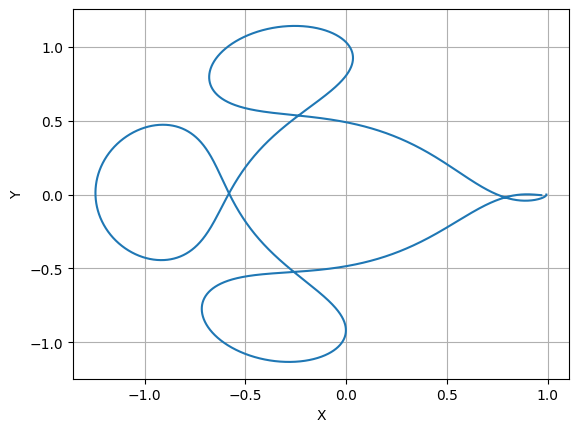

In [684]:
N = 6000
T, X = Dormand_Prince(f, 0, T0, X0, N)
X = np.array(X)
plt.plot(X[:, 0], X[:, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

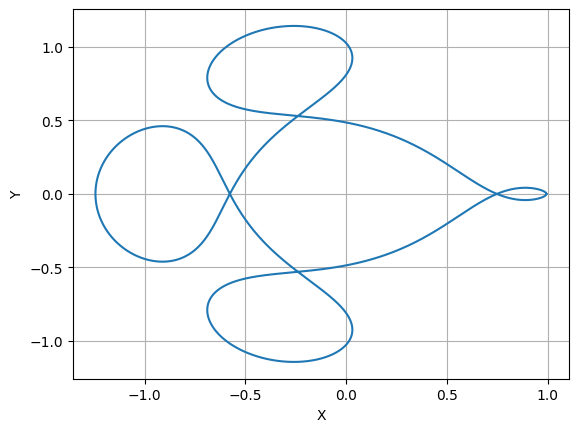

In [686]:
N = 30000
T, X = Dormand_Prince(f, 0, T0, X0, N)
X = np.array(X)
plt.plot(X[:, 0], X[:, 2])
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

Testując schemat Dormanda-Prince'a dla różnej wartości kroku $h = \frac{T_{0}}{100}, \frac{T_{0}}{6000}, \frac{T_{0}}{30000}$ widać, że np. dla $\frac{T_{0}}{6000}$ z zadania pierwszego, metoda pokazuje wyższą dokładność niż schemat Rungego-Kutty przy analogicznym kroku, co jest spowodowane wyższym rzędem - 5 metody Dormanda-Prince'a. Zmniejszając krok do $\frac{T_{0}}{30000}$ widzimy na wykresie, że przybliżona trajektoria już jest okresowa, a zatem dokłądność jest bardzo wysoka. Wybierając krok, uwzgledniono też czas, tak aby program nie był wykonany dosyć szybko.

### Zadanie 4
Usprawnij schemat Dormanda-Prince’a poprzez implementację zmiany długości kroku. W tym celu wylicza się pewną dodatkową wartość:

$$
\hat{x}_{k+1} := x_k + h \left( \frac{5179}{57600} K_1 + \frac{7571}{16695} K_3 + \frac{393}{640} K_4 - \frac{92097}{339200} K_5 + \frac{187}{2100} K_6 + \frac{1}{40} K_7 \right),
$$

którą wykorzystuje się do modyfikacji kroku. Oznaczmy

$$
\text{err} := |x_{k+1} - \hat{x}_{k+1}|,
$$

$$
\text{toll} := 10^{-4}
$$

oraz

$$
\gamma := \left( \frac{\text{toll}}{\text{err}} \right)^{\frac{1}{p+1}},
$$

gdzie $p$ jest ustalonym rzędem schematu Dormanda-Prince’a. Nowy krok to wówczas $\gamma h$. Intuicyjnie - krok zostaje zmniejszony w przypadku, kiedy oszacowany błąd jest większy od zadanej tolerancji lub zwiększony w przeciwnym przypadku. Dla wybranej w Zadaniu 3 wartości kroku początkowego porównaj usprawniony schemat z tym zastosowanym w Zadaniu 3.

**Z poprzedniego zadania wynika, że rząd metody Dormanda-Prince'a** => $p = 5$.

In [687]:
#rząd DP z zadania 3
p = 5

#modyfikacji funkcji z zadania 2
def Dormand_Prince_mod(f, a, b, x0, N): 
    h = (b - a) / N
    T = [a]
    X = [x0]
    t = a
    x = x0
    #dodajemy epsilon, żeby nie dzielić przez zero
    epsilon = 1e-20
    
    for i in range(N):
        K1 = f(t, x)
        K2 = f(t + h / 5, x + h * K1 / 5)
        K3 = f(t + h * (3 / 10), x + h * (K1 * (3 / 40) + K2 * (9 / 40)))
        K4 = f(t + h * (4 / 5), x + h * (K1 * (44 / 45) + K2 * (-56 / 15) + K3 * (32 / 9)))
        K5 = f(t + h * (8 / 9), x + h * (K1 * (19372 / 6561) + K2 * (-25360 / 2187) + K3 * (64448 / 6561) + K4 * (-212 / 729)))
        K6 = f(t + h, x + h * (K1 * (9017 / 3168) + K2 * (-355 / 33) + K3 * (46732 / 5247) + K4 * (49 / 176) + K5 * (-5103 / 18656)))
        K7 = f(t + h, x + h * (K1 * (35 / 384) + K2 * 0 + K3 * (500 / 1113) + K4 * (125 / 192) + K5 * (-2187 / 6784) + K6 * (11/84)))
        
        x_kplus1 = x + h * ((35 / 384) * K1 + 0 * K2 + (500 / 1113) * K3 + (125 / 192) * K4 - (2187 / 6784) * K5 + (11 / 84) * K6 + 0 * K7) 
        
        #Inne nowe oznaczenia z treści zadania 4
        x_daszek = x + h * ((5179 / 57600) * K1 + (7571 / 16695) * K3 + (393 / 640) * K4 - (92097 / 339200) * K5 + (187 / 2100) * K6 + (1 / 40) * K7) 
        err = np.linalg.norm(x_kplus1 - x_daszek)
        toll = 10 ** (-4)
        gamma = (toll / (err + epsilon)) ** (1 / (p + 1))
        h_nowe = gamma * h #zmieniony krok
        
        t = t + h_nowe
        x = x_kplus1
        T.append(t)
        X.append(x)
        
    return T, X

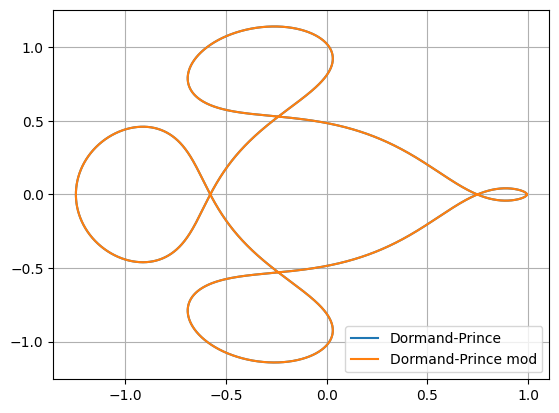

In [688]:
plt.plot(X[:, 0], X[:, 2], label = "Dormand-Prince")

T2, X2 = Dormand_Prince_mod(f, 0, T0, X0, N)
X2 = np.array(X2)

plt.plot(X2[:, 0], X2[:, 2], label = "Dormand-Prince mod")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Widzimy, że oba schematy mają bardzo wysoką dokładność wyników przy N = 30000. Warto też sprawdzić czas działania tych schematów. Do tego będziemy używać bibiliotekę **time**.

In [690]:
import time

In [691]:
start_time = time.time()
Dormand_Prince(f, 0, T0, X0, N)
end_time = time.time()
exe_time = end_time - start_time
print(f"Czas wykonania standardowego Dormand-Prince:{exe_time}")

start_time = time.time()
Dormand_Prince_mod(f, 0, T0, X0, N)
end_time = time.time()
exe_time = end_time - start_time
print(f"Czas wykonania zmodyfikowanego Dormand-Prince:{exe_time}")

Czas wykonania standardowego Dormand-Prince:1.248857021331787
Czas wykonania zmodyfikowanego Dormand-Prince:1.7358100414276123


Wyniki pokazują, że standardowa metoda jest szybsza, a zatem będzie lepsza w przypadku, gdy szybkość w obliczeniach będzie kluczowa. Jeśli chcemy uzyskać większą dokładność, to ze względu na dynamiczne dostosowanie kroku warto wybrać metodą zmodyfikowaną DP.

### Zadanie 5
Wykorzystując uzyskane w Zadaniu 3 rozwiązanie, narysuj przybliżony wykres prezentujący odległość satelity od Ziemi oraz od Księżyca w zależności od czasu. Odległość wyraź w km (aby obliczyć, jak należy przeskalować jednostki, zauważ, że odległość na tej płaszczyźnie pomiędzy Ziemią i Księżycem wynosi 1; faktyczną odległość znajdź w odpowiednich źródłach).

Odległość jest równa 384400, a zatem jest to skala naszego wykresu. 
<br>Przypomnijmy, Ziemia znajduje się w punkcie $(−\mu, 0)$, zaś Księżyc w punkcie $(1 − \mu, 0)$. Zatem odległość $(x,y)$ od współrzędnych Ziemi i Księżyca mają postać:
\begin{equation}
\text{d\_Ziemia}(x, y) = \sqrt{(x + \mu)^2 + y^2} \cdot \text{384400}
\end{equation}

\begin{equation}
\text{d\_Ksiezec}(x, y) = \sqrt{(x -(1 - \mu)^2 + y^2} \cdot \text{384400}
\end{equation}


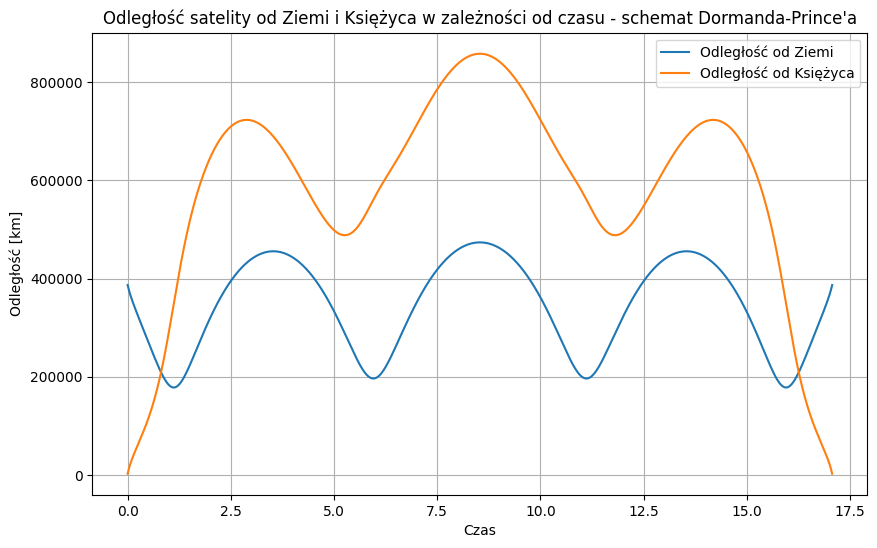

In [694]:
skala = 384400

def d_Ziemia(x, y):
    return np.sqrt((x + mu) ** 2 + y ** 2) * skala

def d_Ksiezec(x, y):
    return np.sqrt((x - (1 - mu)) ** 2 + y ** 2) * skala

plt.figure(figsize=(10, 6))
plt.plot(T, d_Ziemia(X[:, 0], X[:, 2]), label='Odległość od Ziemi')
plt.plot(T, d_Ksiezec(X[:, 0], X[:, 2]), label='Odległość od Księżyca')

plt.xlabel('Czas')
plt.ylabel('Odległość [km]')
plt.title("Odległość satelity od Ziemi i Księżyca w zależności od czasu - schemat Dormanda-Prince'a")
plt.legend()
plt.grid(True)
plt.show()

### Zadanie 6
We wszystkich trzech metodach oblicz odległość pomiędzy punktem $(x(0), y(0))$, a punktem $(x(T_0), y(T_0))$, gdzie $(x(t), y(t))$ jest przybliżonym rozwiązaniem.

Aby sprawdzić to wystarczy wziąć pierwszą i ostatnią wartość zwracaną funkcją odpowiedniego schematu. Ponieważ każda funkcja zwraca macierz wektorów postaci: $(x(t), \dot{x}(t), y(t), \dot{y}(t))$, to trzeba rozdzielić x i y wewnątrz pierwszego wektora dla $t = 0$ i zatem analogicznie dla $t = T_{0}$.

In [695]:
T, X = Euler(f, 0, T0, X0, 24000)
T, X1 = RK4(f, 0, T0, X0, 6000)
T, X2 = Dormand_Prince(f, 0, T0, X0, 30000)

X = np.array(X)
X1 = np.array(X1)
X2 = np.array(X2)

#definiujemy funkcję, która liczy odleglość
def d(u, v):
    return np.sqrt((u[0] - v[0]) ** 2 + (u[1] - v[1]) ** 2) * skala

#Wybieramy z X[0] i X[T0] = X[-1] (ostatni element) wartości tylko x i y, wybierając każdy 2 element w tablicy,
#zaczynając od zerowego elementu
print(f"Metoda Eulera: {d(X[0][::2], X[-1][::2])}")
print(f"Schemat RK4: {d(X1[0][::2], X1[-1][::2])}")
print(f"Schemat DP: {d(X2[0][::2], X2[-1][::2])}")

Metoda Eulera: 742227.2534256398
Schemat RK4: 133911.85537836864
Schemat DP: 0.22156511759975883


Rzeczywiście, w przypadku schematu Dormanda-Prince'a odległość między punktem \((x(0), y(0))\) a \((x(T_0), y(T_0))\) zbliża się do zera. Tak jak się spodziewaliśmy, metoda Eulera wykazała najniższą dokładność.

Porównując metody w kolejności rosnących rzędów dokładności, widzimy, że największą precyzję osiąga metoda Dormanda-Prince'a, a najniższą - metoda Eulera.